In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", font="Times New Roman")

from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import EngFormatter

In [11]:
data = pd.read_csv("/Users/sjb373/data/secure-compression-framework-lib/evaluation/stats/whatsapp_stats_complete.csv")
data["compression_ratio"] = data.raw_bytes/data.compressed_bytes
data["simple_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_simple
data["advanced_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_advanced
data["raw_bytes_mb"] = data.raw_bytes/1000000
data.head()

,n,m,dist,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced,compression_ratio,simple_safe_compression_ratio,advanced_safe_compression_ratio,raw_bytes_mb
0,5,1000,even,1302528,129179,201558,-1,10.083125,6.462299,-1302528.0,1.302528
1,5,1000,random,1298432,129188,202786,-1,10.050717,6.402967,-1298432.0,1.298432
2,5,1000,long_tail,1298432,128337,213750,-1,10.117363,6.074536,-1298432.0,1.298432
3,5,5000,even,2199552,563647,630310,-1,3.902357,3.489635,-2199552.0,2.199552
4,5,5000,random,2191360,562894,627053,-1,3.893024,3.494697,-2191360.0,2.191360


In [12]:
mdata = data.drop(columns=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"]).melt(id_vars=["n", "m", "dist"], value_vars=["raw_bytes", "compressed_bytes", "safe_compressed_bytes_simple"])
mdata["value_mb"] = mdata.value/1000000
mdata.head()

,n,m,dist,variable,value,value_mb
0,5,1000,even,raw_bytes,1302528,1.302528
1,5,1000,random,raw_bytes,1298432,1.298432
2,5,1000,long_tail,raw_bytes,1298432,1.298432
3,5,5000,even,raw_bytes,2199552,2.199552
4,5,5000,random,raw_bytes,2191360,2.191360


In [13]:
ndata = data.rename(columns={"compression_ratio": "default", "advanced_safe_compression_ratio": "physical", "simple_safe_compression_ratio": "logical"}).melt(id_vars=["n", "m", "dist"], value_vars=["default", "logical"])
ndata["value_mb"] = mdata.value/1000000
ndata.head()

,n,m,dist,variable,value,value_mb
0,5,1000,even,default,10.083125,1.302528
1,5,1000,random,default,10.050717,1.298432
2,5,1000,long_tail,default,10.117363,1.298432
3,5,5000,even,default,3.902357,2.199552
4,5,5000,random,default,3.893024,2.191360


In [29]:
ndata[(ndata.dist == "even") & (ndata.n == n)]

,n,m,dist,variable,value,value_mb
63,100,1000,even,default,7.709325,1.425408
66,100,5000,even,default,3.712593,2.273280
69,100,10000,even,default,2.920196,3.407872
72,100,50000,even,default,2.247550,12.582912
75,100,100000,even,default,2.207157,24.428544
78,100,200000,even,default,2.186021,47.955968
81,100,300000,even,default,2.171727,71.286784
169,100,1000,even,logical,0.737922,0.184894
172,100,5000,even,logical,0.937100,0.612316
175,100,10000,even,logical,1.219580,1.167001


/var/folders/sx/g1wlrwxs6t7gtl90xh8ch7rm0000gp/T/ipykernel_46307/1798942470.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(int(x.get_text())/1000)}k' for x in ax.get_xticklabels()])


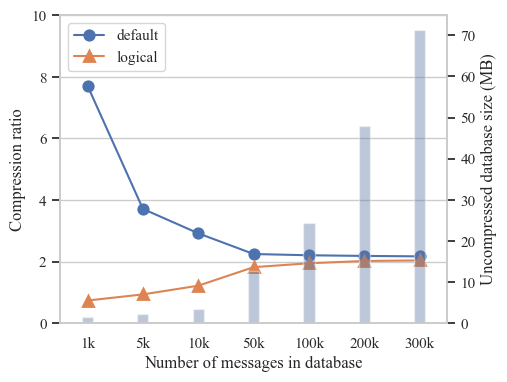

In [45]:
fig = plt.figure(figsize=(5, 4))
ax= fig.gca()
ax2=ax.twinx()
n = 100

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.n == n)], x="m", y="raw_bytes_mb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (MB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.n == n)], x="m", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
for l in ax.lines:
    l.set_linewidth(1.5)
# ax.set_title(f"Database with messages distributed evenly across {n} groups")
ax.set_ybound(0, 10)
ax.set_xlabel("Number of messages in database")
ax.set_ylabel("Compression ratio")
ax.legend(loc="upper left")
ax.set_xticklabels([f'{int(int(x.get_text())/1000)}k' for x in ax.get_xticklabels()])

fig.savefig("whatsapp_m_plot.png", dpi=300, bbox_inches='tight')

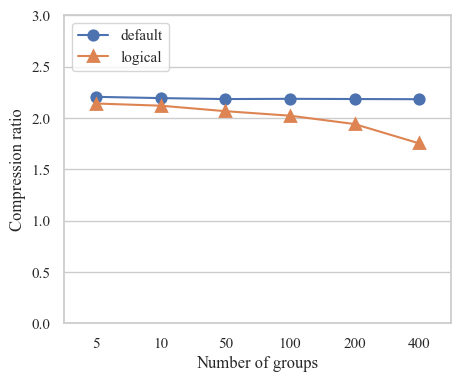

In [46]:
fig = plt.figure(figsize=(5, 4))
ax= fig.gca()
# ax2=ax.twinx()
m = 200000

# Uncompressed size
# sns.barplot(data[(data.dist == "even") & (data.m == m)], x="n", y="raw_bytes_mb", ax=ax2, width=0.2, alpha=0.4)
# ax2.set_ylabel("Uncompressed database size (MB)")
# ax2.grid(False)
# ax2.set_ybound(0, 65)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.m == m)], x="n", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
for l in ax.lines:
    l.set_linewidth(1.5)
# ax.set_title(f"Database with {m} messages distributed evenly across groups")
ax.set_ybound(0, 3)
ax.set_xlabel("Number of groups")
ax.set_ylabel("Compression ratio")
ax.legend(loc="upper left")

fig.savefig("whatsapp_n_plot.png", dpi=300, bbox_inches='tight')

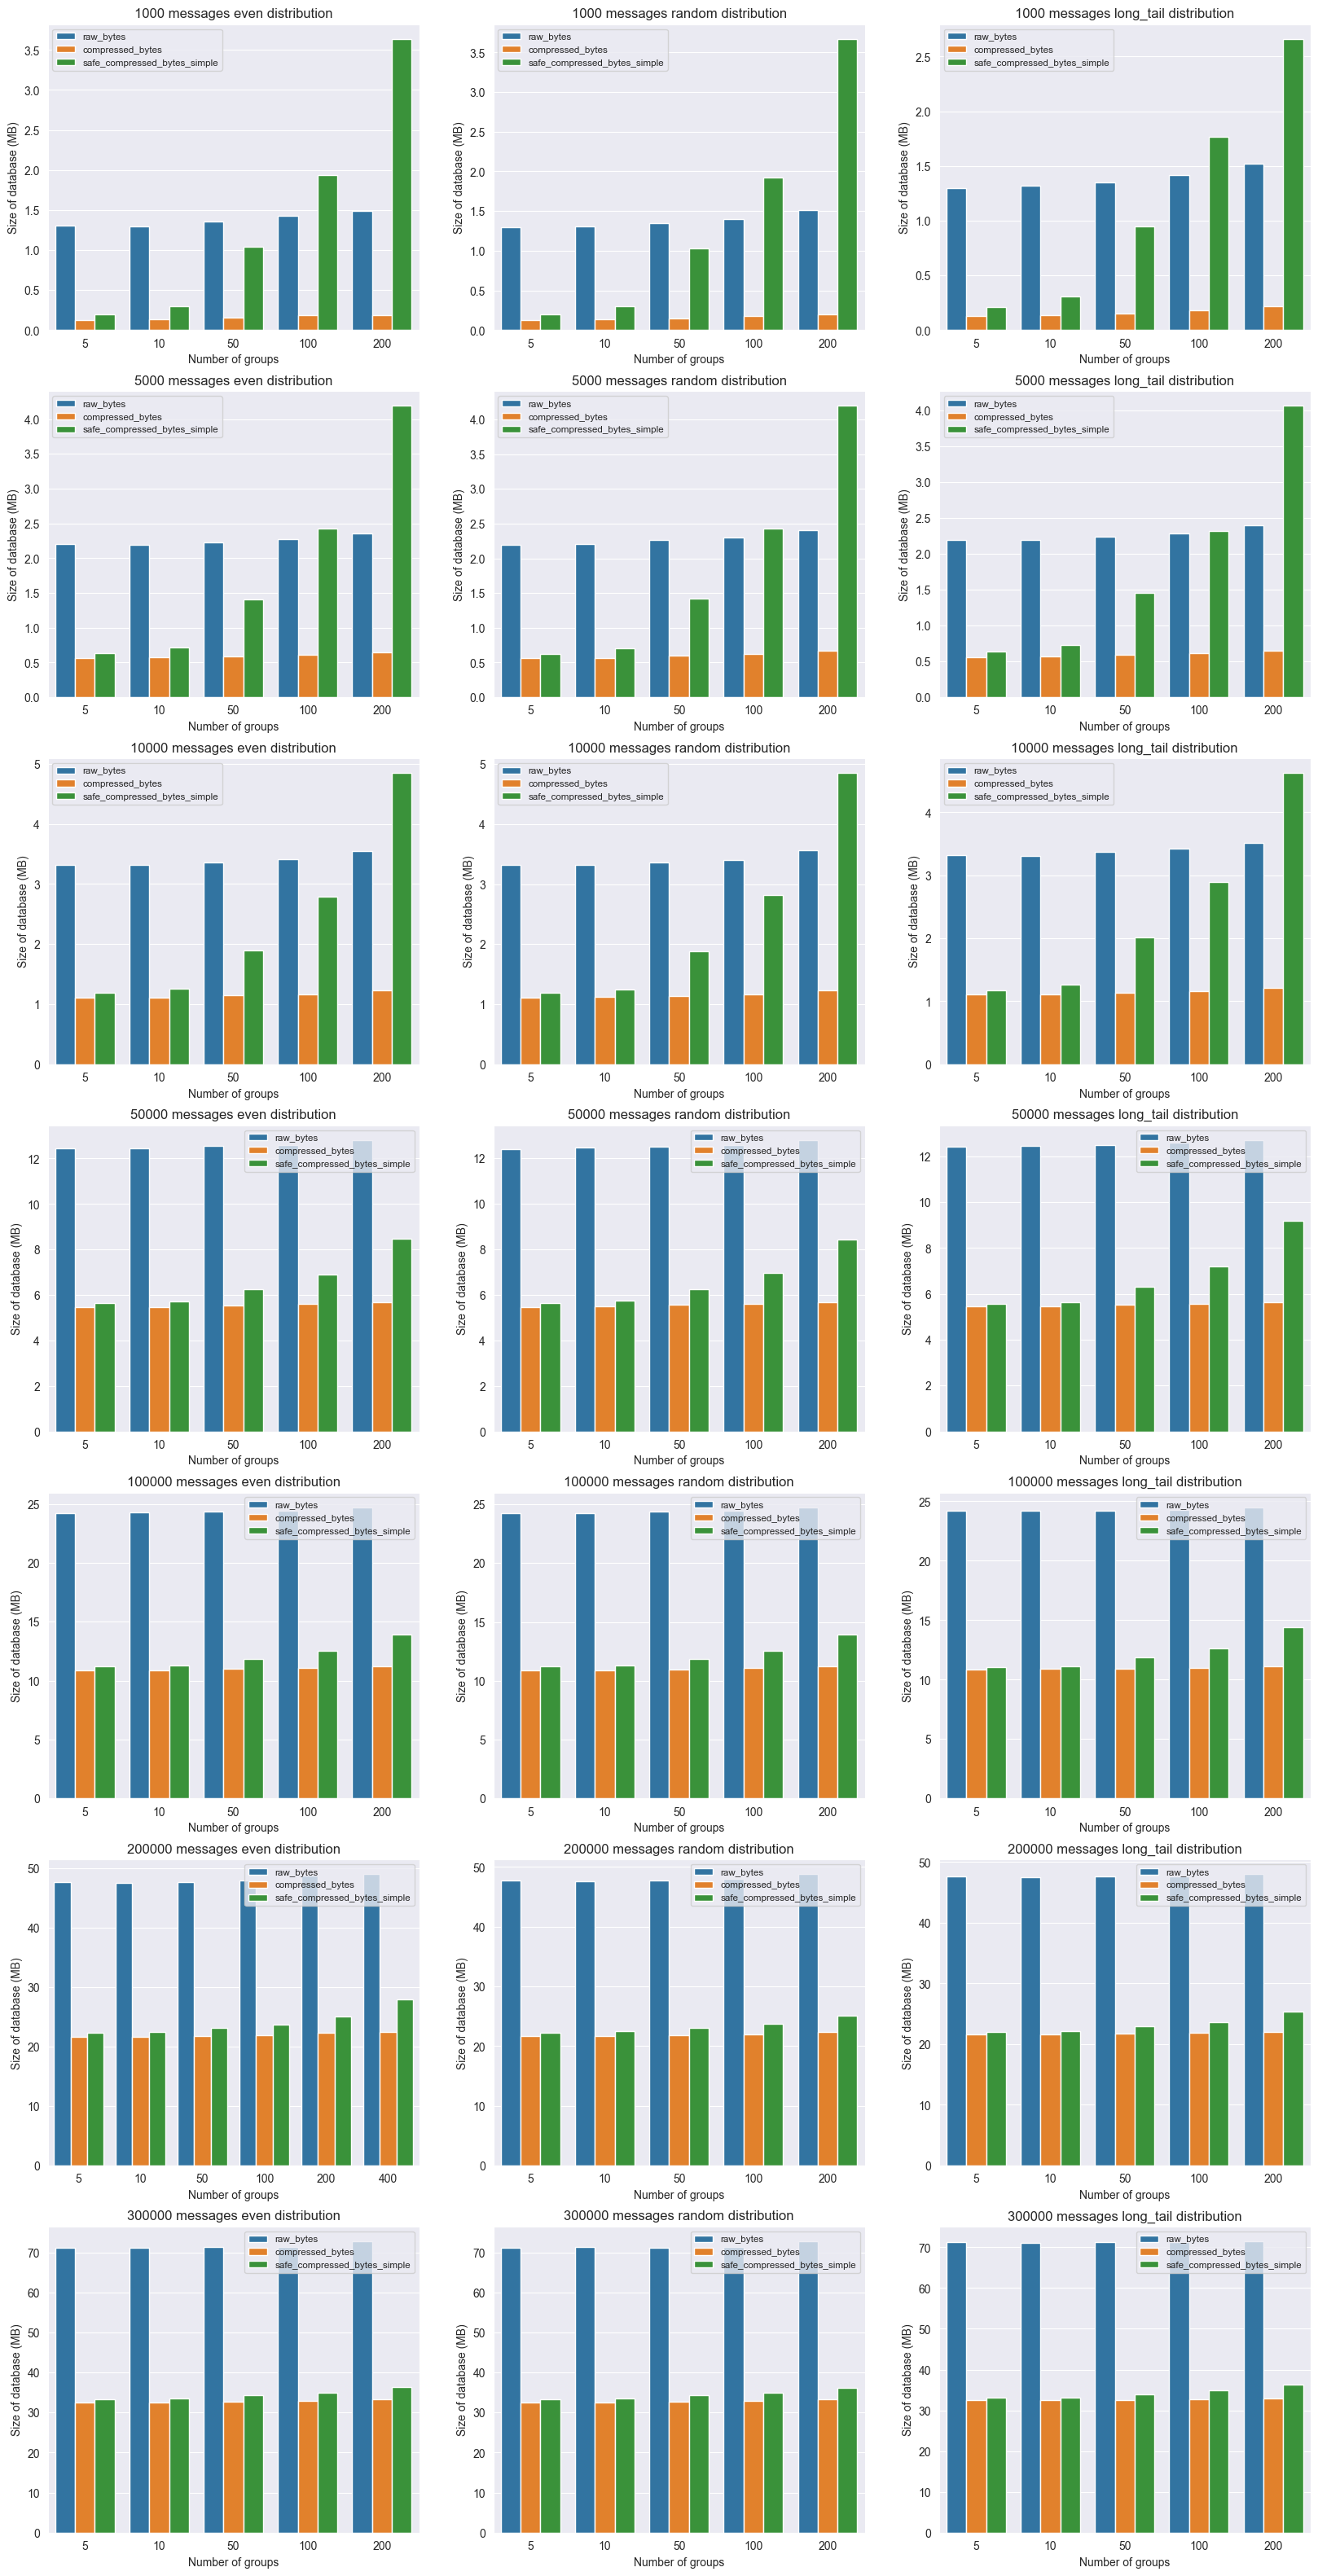

In [46]:
fig, axes = plt.subplots(data.m.nunique(), data.dist.nunique(), figsize=(20, 40))
for i, m in enumerate(data.m.unique()):
    for j, dist in enumerate(data.dist.unique()):
        sns.barplot(mdata[(mdata.m == m) & (mdata.dist == dist)], x="n", y="value_mb", hue="variable", ax=axes[i, j])
        axes[i, j].set_title(f"{m} messages {dist} distribution")
        axes[i, j].set_xlabel("Number of groups")
        axes[i, j].set_ylabel("Size of database (MB)")
        axes[i, j].legend(fontsize="small")
        # axes[i, j].set_ybound(0, 170)
        
plt.savefig("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats.png")